In [35]:
import pandas as pd
from imblearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion
from sklearn import preprocessing
from sklearn.svm import LinearSVC


In [4]:
def svm_func(df):

    # keep test_set apart
    df_train, df_test = train_test_split(df, test_size=0.25, stratify=df['reenrolled'], shuffle=True,
                                             random_state=0)
    X_train = df_train['motivation']
    y_train = df_train['reenrolled']
    X_test = df_test['motivation']
    y_test = df_test['reenrolled']

 
    stopword_list = list(stopwords.words('Dutch'))

    pipe = make_pipeline(TfidfVectorizer(lowercase=True, stop_words=stopword_list), SVC(class_weight='balanced'))
    scores = cross_val_score(pipe, X_train, y_train, cv=5)

    print('5-fold cross validation scores:', scores)
    print('average of 5-fold cross validation scores:', scores.mean())

    pipe.fit(X_train, y_train)
    predictions = pipe.predict(X_test)
    print("Accuracy for SVM on test_set: %s" % accuracy_score(y_test, predictions))
    cm = confusion_matrix(y_test, predictions)
    print(classification_report(y_test, predictions))

  
    sns.heatmap(cm / np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
    plt.show()



5-fold cross validation scores: [0.74220963 0.73654391 0.74409821 0.7299339  0.74787535]
average of 5-fold cross validation scores: 0.7401322001888574
Accuracy for SVM on test_set: 0.7376770538243627
              precision    recall  f1-score   support

           0       0.78      0.92      0.84      1349
           1       0.35      0.13      0.19       416

    accuracy                           0.74      1765
   macro avg       0.56      0.53      0.52      1765
weighted avg       0.68      0.74      0.69      1765



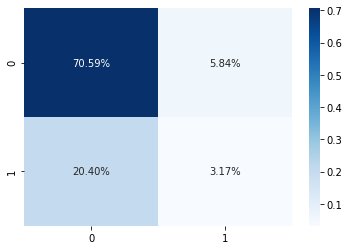

In [5]:
df = pd.read_csv(r'..\data\processed\motivation_liwc_meta_pos_topic_n15.csv')
# df.dropna(subset=['bsa_dummy', 'motivation'], inplace=True)
df = df.fillna(method='ffill')

svm_func(df)

# 2- Initial numeric features


In [16]:
def svm_initial_features(df):  
    df = df.fillna(method='ffill')
    categorical_features = ['cohort', 'field', 'prior_educ', 'previously_enrolled', 'multiple_requests', 'gender',
                                'interest', 'ase', 'year', 'program']
    numeric_features = ['age', 'HSGPA']
    target = df['reenrolled']
    df1 = df[categorical_features]
    df2 = df[numeric_features]
    df = pd.concat([df1, df2], axis=1)
    df = pd.concat([df, target], axis=1)

    # keep test_set apart
    df_train, df_test = train_test_split(df, test_size=0.25, stratify=df['reenrolled'], shuffle=True,
                                             random_state=0)

    X_train = df_train.loc[:,df_train.columns !='reenrolled']
    y_train = df_train['reenrolled']
    X_test = df_test.loc[:,df_test.columns !='reenrolled']
    y_test = df_test['reenrolled']
    
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])

 
    pipe = make_pipeline(preprocessor,                         
                         SVC(class_weight='balanced'))
    
    scores = cross_val_score(pipe, X_train, y_train, cv=5)

    print('5-fold cross validation scores:', scores)
    print('average of 5-fold cross validation scores:', scores.mean())

    pipe.fit(X_train, y_train)
    predictions = pipe.predict(X_test)
    print("Accuracy for SVM on test_set: %s" % accuracy_score(y_test, predictions))
    cm = confusion_matrix(y_test, predictions)
    print(classification_report(y_test, predictions))

  
    sns.heatmap(cm / np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
    plt.show()

5-fold cross validation scores: [0.6279509  0.61378659 0.62322946 0.58545798 0.62983947]
average of 5-fold cross validation scores: 0.6160528800755429
Accuracy for SVM on test_set: 0.6090651558073654
              precision    recall  f1-score   support

           0       0.84      0.60      0.70      1349
           1       0.33      0.63      0.43       416

    accuracy                           0.61      1765
   macro avg       0.59      0.62      0.57      1765
weighted avg       0.72      0.61      0.64      1765



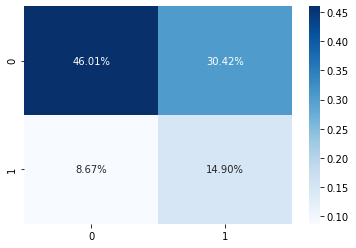

In [17]:
df = pd.read_csv(r'..\data\processed\motivation_liwc_meta_pos_topic_n15.csv')

svm_initial_features(df)

# 3- Added features + initial features- only numeric and categorical

In [20]:
def svm_all_nontext_features(df):
    df = df.fillna(method='ffill')
    categorical_features = ['cohort', 'field', 'prior_educ', 'previously_enrolled', 'multiple_requests', 'gender',
                                'interest', 'ase', 'year', 'program']
    numeric_features = ['age', 'HSGPA', 'WC', 'WPS', 'Sixltr',
                            'Dic', 'funct', 'pronoun', 'ppron', 'i',
                            'we', 'you', 'shehe', 'they', 'ipron',
                            'article', 'verb', 'auxverb', 'past', 'present',
                            'future', 'adverb', 'preps', 'conj', 'negate',
                            'quant', 'number', 'swear', 'social', 'family',
                            'friend', 'humans', 'affect', 'posemo', 'negemo',
                            'anx', 'anger', 'sad', 'cogmech', 'insight',
                            'cause', 'discrep', 'tentat', 'certain', 'inhib',
                            'incl', 'excl', 'percept', 'see', 'hear',
                            'feel', 'bio', 'body', 'health', 'sexual',
                            'ingest', 'relativ', 'motion', 'space', 'time',
                            'work', 'achieve', 'leisure', 'home', 'money',
                            'relig', 'death', 'assent', 'nonfl', 'filler',
                            'pronadv', 'shehethey', 'AllPunc', 'Period', 'Comma',
                            'Colon', 'SemiC', 'QMark', 'Exclam', 'Dash',
                            'Quote', 'Apostro', 'Parenth', 'OtherP', 'count_punct',
                            'count_stopwords', 'nr_token', 'nr_adj', 'nr_noun', 'nr_verb',
                            'nr_number', 'topic1', 'topic2', 'topic3', 'topic4',
                            'topic5', 'topic6', 'topic7', 'topic8', 'topic9',
                            'topic10', 'topic11', 'topic12', 'topic13', 'topic14',
                            'topic15']

    # Change object (string) type of features to float
    change_type = ['WPS', 'Sixltr',
                       'Dic', 'funct', 'pronoun', 'ppron', 'i',
                       'we', 'you', 'shehe', 'they', 'ipron',
                       'article', 'verb', 'auxverb', 'past', 'present',
                       'future', 'adverb', 'preps', 'conj', 'negate',
                       'quant', 'number', 'swear', 'social', 'family',
                       'friend', 'humans', 'affect', 'posemo', 'negemo',
                       'anx', 'anger', 'sad', 'cogmech', 'insight',
                       'cause', 'discrep', 'tentat', 'certain', 'inhib',
                       'incl', 'excl', 'percept', 'see', 'hear',
                       'feel', 'bio', 'body', 'health', 'sexual',
                       'ingest', 'relativ', 'motion', 'space', 'time',
                       'work', 'achieve', 'leisure', 'home', 'money',
                       'relig', 'death', 'assent', 'nonfl', 'filler',
                       'pronadv', 'shehethey', 'AllPunc', 'Period', 'Comma',
                       'Colon', 'SemiC', 'QMark', 'Exclam', 'Dash',
                       'Quote', 'Apostro', 'Parenth', 'OtherP']
    df[change_type] = df[change_type].apply(lambda x: x.str.replace(',', '.'))
    df[change_type] = df[change_type].astype(float).fillna(0.0)

    target = df['reenrolled']

    df1 = df[categorical_features]
    df2 = df[numeric_features]
    df = pd.concat([df1, df2], axis=1)
    df = pd.concat([df, target], axis=1)

    # keep test_set apart
    df_train, df_test = train_test_split(df, test_size=0.25, stratify=df['reenrolled'], shuffle=True,
                                             random_state=0)

    X_train = df_train.loc[:,df_train.columns !='reenrolled']
    y_train = df_train['reenrolled']
    X_test = df_test.loc[:,df_test.columns !='reenrolled']
    y_test = df_test['reenrolled']
    
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])

 
    pipe = make_pipeline(preprocessor,                         
                         SVC(class_weight='balanced'))
    
    scores = cross_val_score(pipe, X_train, y_train, cv=5)

    print('5-fold cross validation scores:', scores)
    print('average of 5-fold cross validation scores:', scores.mean())

    pipe.fit(X_train, y_train)
    predictions = pipe.predict(X_test)
    print("Accuracy for SVM on test_set: %s" % accuracy_score(y_test, predictions))
    cm = confusion_matrix(y_test, predictions)
    print(classification_report(y_test, predictions))

  
    sns.heatmap(cm / np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
    plt.show()



5-fold cross validation scores: [0.66383381 0.61567517 0.66383381 0.65061379 0.64589235]
average of 5-fold cross validation scores: 0.6479697828139754
Accuracy for SVM on test_set: 0.6390934844192635
              precision    recall  f1-score   support

           0       0.80      0.71      0.75      1349
           1       0.30      0.41      0.35       416

    accuracy                           0.64      1765
   macro avg       0.55      0.56      0.55      1765
weighted avg       0.68      0.64      0.66      1765



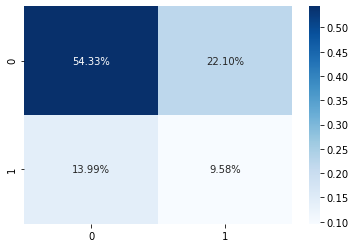

In [21]:
df = pd.read_csv(r'..\data\processed\motivation_liwc_meta_pos_topic_n15.csv')

svm_all_nontext_features(df)

# 4- Text + Initial non-textual features

In [31]:
def svm_text_initial_features(df):
    stopword_list = list(stopwords.words('Dutch'))

    df = df.fillna(method='ffill')
    categorical_features = ['cohort', 'field', 'prior_educ', 'previously_enrolled', 'multiple_requests', 'gender',
                                'interest', 'ase', 'year', 'program']
    numeric_features = ['age', 'HSGPA']
    text_features = ['motivation']
    
    target = df['reenrolled']
    
    get_text_data = FunctionTransformer(lambda x: x['motivation'], validate=False)
    get_numeric_data = FunctionTransformer(lambda x: x[numeric_features], validate=False)
    get_categorical_data = FunctionTransformer(lambda x: x[categorical_features], validate=False)

    process_and_join_features = Pipeline([
        ('features', FeatureUnion([
            ('numeric_features', Pipeline([
                ('selector', get_numeric_data),
                ('scaler', preprocessing.StandardScaler())

            ])),
            ('categorical_features', Pipeline([
                ('selector', get_categorical_data),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))

            ])),
            ('text_features', Pipeline([
                ('selector', get_text_data),
                ('vec', TfidfVectorizer(lowercase=True, stop_words=stopword_list))
            ]))
        ])),


        ('clf', SVC(class_weight='balanced'))
    ])
    
  
    
    df = df.dropna()
    text = df['motivation']
    num = df[numeric_features]
    cat = df[categorical_features]
    df_features =pd.concat([text,num], axis=1)
    df_features =pd.concat([df_features,cat], axis=1)

    
    X_train, X_val, y_train, y_val = train_test_split(df_features, df['reenrolled'], stratify=df['reenrolled'], test_size=0.25, random_state=0)
    
 
    process_and_join_features.fit(X_train, y_train)
#     predictions_lt = process_and_join_features.predict(X_val)
    
    scores = cross_val_score(process_and_join_features, X_train, y_train, cv=5)

    print('5-fold cross validation scores:', scores)
    print('average of 5-fold cross validation scores:', scores.mean())

    process_and_join_features.fit(X_train, y_train)
    predictions = process_and_join_features.predict(X_val)
    print("Accuracy for SVM on test_set: %s" % accuracy_score(y_val, predictions))
    cm = confusion_matrix(y_val, predictions)
    print(classification_report(y_val, predictions))

  
    sns.heatmap(cm / np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
    plt.show()


5-fold cross validation scores: [0.63172805 0.61756374 0.63456091 0.59301228 0.6421152 ]
average of 5-fold cross validation scores: 0.6237960339943343
Accuracy for SVM on test_set: 0.6169971671388101
              precision    recall  f1-score   support

           0       0.84      0.61      0.71      1349
           1       0.33      0.63      0.44       416

    accuracy                           0.62      1765
   macro avg       0.59      0.62      0.57      1765
weighted avg       0.72      0.62      0.65      1765



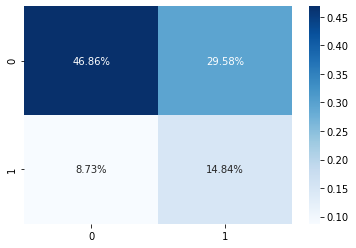

In [32]:
df = pd.read_csv(r'..\data\processed\motivation_liwc_meta_pos_topic_n15.csv')


svm_text_initial_features(df)

# 5- Text + all non-textual features

In [36]:
def svm_all_features(df):
    stopword_list = list(stopwords.words('Dutch'))

    df = df.fillna(method='ffill')
    categorical_features = ['cohort', 'field', 'prior_educ', 'previously_enrolled', 'multiple_requests', 'gender',
                                'interest', 'ase', 'year', 'program']
    numeric_features = ['age', 'HSGPA', 'WC', 'WPS', 'Sixltr',
                        'Dic', 'funct', 'pronoun', 'ppron', 'i',
                        'we', 'you', 'shehe', 'they', 'ipron',
                        'article', 'verb', 'auxverb', 'past', 'present',
                        'future', 'adverb', 'preps', 'conj', 'negate',
                        'quant', 'number', 'swear', 'social', 'family',
                        'friend', 'humans', 'affect', 'posemo', 'negemo',
                        'anx', 'anger', 'sad', 'cogmech', 'insight',
                        'cause', 'discrep', 'tentat', 'certain', 'inhib',
                        'incl', 'excl', 'percept', 'see', 'hear',
                        'feel', 'bio', 'body', 'health', 'sexual',
                        'ingest', 'relativ', 'motion', 'space', 'time',
                        'work', 'achieve', 'leisure', 'home', 'money',
                        'relig', 'death', 'assent', 'nonfl', 'filler',
                        'pronadv', 'shehethey', 'AllPunc', 'Period', 'Comma',
                        'Colon', 'SemiC', 'QMark', 'Exclam', 'Dash',
                        'Quote', 'Apostro', 'Parenth', 'OtherP', 'count_punct',
                        'count_stopwords', 'nr_token', 'nr_adj', 'nr_noun', 'nr_verb',
                        'nr_number', 'topic1', 'topic2', 'topic3', 'topic4',
                        'topic5', 'topic6', 'topic7', 'topic8', 'topic9',
                        'topic10', 'topic11', 'topic12', 'topic13', 'topic14',
                        'topic15']
    text_features = ['motivation']
    
    target = df['reenrolled']
    
    get_text_data = FunctionTransformer(lambda x: x['motivation'], validate=False)
    get_numeric_data = FunctionTransformer(lambda x: x[numeric_features], validate=False)
    get_categorical_data = FunctionTransformer(lambda x: x[categorical_features], validate=False)

    process_and_join_features = Pipeline([
        ('features', FeatureUnion([
            ('numeric_features', Pipeline([
                ('selector', get_numeric_data),
                ('scaler', preprocessing.StandardScaler())

            ])),
            ('categorical_features', Pipeline([
                ('selector', get_categorical_data),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))

            ])),
            ('text_features', Pipeline([
                ('selector', get_text_data),
                ('vec', TfidfVectorizer(lowercase=True, stop_words=stopword_list)),
                ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False)))
            ]))
        ])),


        ('clf', SVC(class_weight='balanced'))
    ])
    
  
    
    df = df.dropna()
    text = df['motivation']
    num = df[numeric_features]
    cat = df[categorical_features]
    df_features =pd.concat([text,num], axis=1)
    df_features =pd.concat([df_features,cat], axis=1)

    
    X_train, X_val, y_train, y_val = train_test_split(df_features, df['reenrolled'], stratify=df['reenrolled'], test_size=0.25, random_state=0)
    
 
    process_and_join_features.fit(X_train, y_train)
#     predictions_lt = process_and_join_features.predict(X_val)
    
    scores = cross_val_score(process_and_join_features, X_train, y_train, cv=5)

    print('5-fold cross validation scores:', scores)
    print('average of 5-fold cross validation scores:', scores.mean())

    process_and_join_features.fit(X_train, y_train)
    predictions = process_and_join_features.predict(X_val)
    print("Accuracy for SVM on test_set: %s" % accuracy_score(y_val, predictions))
    cm = confusion_matrix(y_val, predictions)
    print(classification_report(y_val, predictions))

  
    sns.heatmap(cm / np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
    plt.show()


5-fold cross validation scores: [0.66288952 0.62134089 0.66572238 0.6496695  0.64683664]
average of 5-fold cross validation scores: 0.6492917847025496
Accuracy for SVM on test_set: 0.6407932011331445
              precision    recall  f1-score   support

           0       0.80      0.71      0.75      1349
           1       0.30      0.41      0.35       416

    accuracy                           0.64      1765
   macro avg       0.55      0.56      0.55      1765
weighted avg       0.68      0.64      0.66      1765



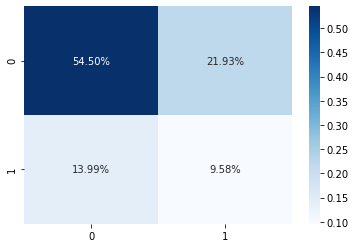

In [37]:
df = pd.read_csv(r'..\data\processed\motivation_liwc_meta_pos_topic_n15.csv')
change_type = ['WPS', 'Sixltr',
                   'Dic', 'funct', 'pronoun', 'ppron', 'i',
                   'we', 'you', 'shehe', 'they', 'ipron',
                   'article', 'verb', 'auxverb', 'past', 'present',
                   'future', 'adverb', 'preps', 'conj', 'negate',
                   'quant', 'number', 'swear', 'social', 'family',
                   'friend', 'humans', 'affect', 'posemo', 'negemo',
                   'anx', 'anger', 'sad', 'cogmech', 'insight',
                   'cause', 'discrep', 'tentat', 'certain', 'inhib',
                   'incl', 'excl', 'percept', 'see', 'hear',
                   'feel', 'bio', 'body', 'health', 'sexual',
                   'ingest', 'relativ', 'motion', 'space', 'time',
                   'work', 'achieve', 'leisure', 'home', 'money',
                   'relig', 'death', 'assent', 'nonfl', 'filler',
                   'pronadv', 'shehethey', 'AllPunc', 'Period', 'Comma',
                   'Colon', 'SemiC', 'QMark', 'Exclam', 'Dash',
                   'Quote', 'Apostro', 'Parenth', 'OtherP']
df[change_type] = df[change_type].apply(lambda x: x.str.replace(',', '.'))
df[change_type] = df[change_type].astype(float).fillna(0.0)
svm_all_features(df)

# 6 - Text + all features excluding LIWC


In [42]:
def svm_all_without_liwc_features(df):
    stopword_list = list(stopwords.words('Dutch'))

    df = df.fillna(method='ffill')
    categorical_features = ['cohort', 'field', 'prior_educ', 'previously_enrolled', 'multiple_requests', 'gender',
                                'interest', 'ase', 'year', 'program']
    numeric_features = ['age', 'HSGPA', 'nr_token', 'nr_adj', 'nr_noun', 'nr_verb',
                        'nr_number', 'topic1', 'topic2', 'topic3', 'topic4',
                        'topic5', 'topic6', 'topic7', 'topic8', 'topic9',
                        'topic10', 'topic11', 'topic12', 'topic13', 'topic14',
                        'topic15']
    text_features = ['motivation']
    
    target = df['reenrolled']
    
    get_text_data = FunctionTransformer(lambda x: x['motivation'], validate=False)
    get_numeric_data = FunctionTransformer(lambda x: x[numeric_features], validate=False)
    get_categorical_data = FunctionTransformer(lambda x: x[categorical_features], validate=False)

    process_and_join_features = Pipeline([
        ('features', FeatureUnion([
            ('numeric_features', Pipeline([
                ('selector', get_numeric_data),
                ('scaler', preprocessing.StandardScaler())

            ])),
            ('categorical_features', Pipeline([
                ('selector', get_categorical_data),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))

            ])),
            ('text_features', Pipeline([
                ('selector', get_text_data),
                ('vec', TfidfVectorizer(lowercase=True, stop_words=stopword_list)),
                ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False)))
            ]))
        ])),


        ('clf', SVC(class_weight='balanced'))
    ])
    
  
    
    df = df.dropna()
    text = df['motivation']
    num = df[numeric_features]
    cat = df[categorical_features]
    df_features =pd.concat([text,num], axis=1)
    df_features =pd.concat([df_features,cat], axis=1)

    
    X_train, X_val, y_train, y_val = train_test_split(df_features, df['reenrolled'], stratify=df['reenrolled'], test_size=0.25, random_state=0)
    
 
    process_and_join_features.fit(X_train, y_train)
#     predictions_lt = process_and_join_features.predict(X_val)
    
    scores = cross_val_score(process_and_join_features, X_train, y_train, cv=5)

    print('5-fold cross validation scores:', scores)
    print('average of 5-fold cross validation scores:', scores.mean())

    process_and_join_features.fit(X_train, y_train)
    predictions = process_and_join_features.predict(X_val)
    print("Accuracy for SVM on test_set: %s" % accuracy_score(y_val, predictions))
    cm = confusion_matrix(y_val, predictions)
    print(classification_report(y_val, predictions))

  
    sns.heatmap(cm / np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
    plt.show()


5-fold cross validation scores: [0.62134089 0.59678942 0.62606232 0.56751653 0.61095373]
average of 5-fold cross validation scores: 0.6045325779036828
Accuracy for SVM on test_set: 0.6073654390934844
              precision    recall  f1-score   support

           0       0.83      0.62      0.71      1349
           1       0.32      0.58      0.41       416

    accuracy                           0.61      1765
   macro avg       0.57      0.60      0.56      1765
weighted avg       0.71      0.61      0.64      1765



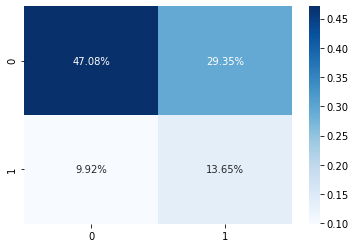

In [43]:
df = pd.read_csv(r'..\data\processed\motivation_liwc_meta_pos_topic_n15.csv')

svm_all_without_liwc_features(df)